# Regresión.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_absolute_error, f1_score
# Definamos el `random_state`:
random_state = 42


In [ ]:
# Carguemos los datos:
data = pd.read_csv('https://drive.google.com/u/0/uc?id=1XEPHdH_CjYfmZTs9tMK8E7iUQ0P-ulQZ&export=download', header=0)
data


,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,Ford_Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford_Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford_Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford_Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford_Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
33117,VW_Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
33118,VW_Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
33119,VW_Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
33120,VW_Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [ ]:
# Veamos la descripción del dataset:
data.describe(include='all')



,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
count,33122,33122.000000,33122.000000,33122,33122.000000,33122,33122.000000,33122.000000,33122.000000
unique,50,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,Ford_Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,6557,NaN,NaN,24934,NaN,20731,NaN,NaN,NaN
mean,NaN,2017.044683,14366.095797,NaN,22782.077592,NaN,113.064428,56.006241,1.465168
std,NaN,2.060700,6698.673164,NaN,20266.265383,NaN,62.688154,12.043983,0.463069
min,NaN,1996.000000,495.000000,NaN,1.000000,NaN,0.000000,0.300000,0.000000
25%,NaN,2016.000000,9750.000000,NaN,8207.000000,NaN,30.000000,48.700000,1.000000
50%,NaN,2017.000000,12880.000000,NaN,17506.000000,NaN,145.000000,56.500000,1.500000
75%,NaN,2019.000000,17798.000000,NaN,31398.500000,NaN,145.000000,62.800000,2.000000


In [ ]:
# Eliminemos los registros con tamaño del motor menor a 1 litro:
data.drop(index=data[data.engineSize < 1].index, inplace=True)



In [ ]:
# Eliminemos el registro con año mayor que 2020:
data.drop(index=data[data['year'] > 2020].index, inplace=True)


In [ ]:
data.fuelType.value_counts()

Petrol      20677
Diesel      12122
Hybrid        166
Other          88
Electric        2
Name: fuelType, dtype: int64

In [ ]:
# Hay muy pocos automóviles eléctricos; agreguémoslos a la categoría `Other`:
data.loc[data.fuelType == 'Electric', 'fuelType'] = 'Other'



In [ ]:
data.loc[data.fuelType == 'Hybrid', 'fuelType'] = 'Other'


In [ ]:
data.brand_model.unique()

array(['Ford_Fiesta', 'Ford_Focus', 'Ford_Puma', 'Ford_Kuga',
       'Ford_EcoSport', 'Ford_C-MAX', 'Ford_Mondeo', 'Ford_Ka+',
       'Ford_Tourneo Custom', 'Ford_S-MAX', 'Ford_B-MAX', 'Ford_Edge',
       'Ford_Tourneo Connect', 'Ford_Grand C-MAX', 'Ford_KA',
       'Ford_Galaxy', 'Ford_Mustang', 'Ford_Grand Tourneo Connect',
       'Ford_Fusion', 'Ford_Ranger', 'Ford_Streetka', 'Ford_Escort',
       'Ford_Transit Tourneo', 'VW_T-Roc', 'VW_Golf', 'VW_Passat',
       'VW_T-Cross', 'VW_Polo', 'VW_Tiguan', 'VW_Sharan', 'VW_Up',
       'VW_Scirocco', 'VW_Beetle', 'VW_Caddy Maxi Life', 'VW_Caravelle',
       'VW_Touareg', 'VW_Arteon', 'VW_Touran', 'VW_Golf SV', 'VW_Amarok',
       'VW_Tiguan Allspace', 'VW_Shuttle', 'VW_Jetta', 'VW_CC',
       'VW_California', 'VW_Caddy Life', 'VW_Caddy', 'VW_Caddy Maxi',
       'VW_Eos', 'VW_Fox'], dtype=object)

In [ ]:
#Codificacion 1: OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(data.brand_model.array.reshape(-1, 1))
df_brand=pd.DataFrame(enc.transform(data.brand_model.array.reshape(-1, 1)).toarray(), columns=enc.get_feature_names_out())


enc = OneHotEncoder().fit(data.transmission.array.reshape(-1, 1))
df_trans=pd.DataFrame(enc.transform(data.transmission.array.reshape(-1, 1)).toarray(), columns=enc.get_feature_names_out())

enc = OneHotEncoder().fit(data.fuelType.array.reshape(-1, 1))
df_fuel=pd.DataFrame(enc.transform(data.fuelType.array.reshape(-1, 1)).toarray(), columns=enc.get_feature_names_out())




In [ ]:
df_brand

,x0_Ford_B-MAX,x0_Ford_C-MAX,x0_Ford_EcoSport,x0_Ford_Edge,x0_Ford_Escort,x0_Ford_Fiesta,x0_Ford_Focus,x0_Ford_Fusion,x0_Ford_Galaxy,x0_Ford_Grand C-MAX,...,x0_VW_Scirocco,x0_VW_Sharan,x0_VW_Shuttle,x0_VW_T-Cross,x0_VW_T-Roc,x0_VW_Tiguan,x0_VW_Tiguan Allspace,x0_VW_Touareg,x0_VW_Touran,x0_VW_Up
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,Ford_Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Ford_Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Ford_Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Ford_Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Ford_Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
33117,VW_Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
33118,VW_Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
33119,VW_Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
33120,VW_Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


In [ ]:
data=pd.concat([
    data.drop(columns=['fuelType','transmission','brand_model']).reset_index(drop=True),
    df_brand,df_trans,df_fuel
], axis=1)

data

,year,price,mileage,tax,milesPerGallon,engineSize,x0_Ford_B-MAX,x0_Ford_C-MAX,x0_Ford_EcoSport,x0_Ford_Edge,...,x0_VW_Tiguan Allspace,x0_VW_Touareg,x0_VW_Touran,x0_VW_Up,x0_Automatic,x0_Manual,x0_Semi-Auto,x0_Diesel,x0_Other,x0_Petrol
0,2017,12000,15944,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2018,14000,9083,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2017,13000,12456,150,57.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2019,17500,10460,145,40.3,1.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2019,16500,1482,145,48.7,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33050,2012,5990,74000,125,58.9,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
33051,2008,1799,88102,145,46.3,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
33052,2009,1590,70000,200,42.0,1.4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
33053,2006,1250,82704,150,46.3,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Codificacion 2 ordinal encoding
#Apliquemos "ordinal encoding" a las características categóricas
# (dado que usaremos modelos basados en árboles de decisión):
for feature in ('brand_model', 'transmission', 'fuelType'):
    print(data[feature].astype('category').cat.categories)
    data.loc[:, feature] = data[feature].astype('category').cat.codes
data

Index(['Ford_B-MAX', 'Ford_C-MAX', 'Ford_EcoSport', 'Ford_Edge', 'Ford_Escort',
       'Ford_Fiesta', 'Ford_Focus', 'Ford_Fusion', 'Ford_Galaxy',
       'Ford_Grand C-MAX', 'Ford_Grand Tourneo Connect', 'Ford_KA', 'Ford_Ka+',
       'Ford_Kuga', 'Ford_Mondeo', 'Ford_Mustang', 'Ford_Puma', 'Ford_Ranger',
       'Ford_S-MAX', 'Ford_Streetka', 'Ford_Tourneo Connect',
       'Ford_Tourneo Custom', 'Ford_Transit Tourneo', 'VW_Amarok', 'VW_Arteon',
       'VW_Beetle', 'VW_CC', 'VW_Caddy', 'VW_Caddy Life', 'VW_Caddy Maxi',
       'VW_Caddy Maxi Life', 'VW_California', 'VW_Caravelle', 'VW_Eos',
       'VW_Fox', 'VW_Golf', 'VW_Golf SV', 'VW_Jetta', 'VW_Passat', 'VW_Polo',
       'VW_Scirocco', 'VW_Sharan', 'VW_Shuttle', 'VW_T-Cross', 'VW_T-Roc',
       'VW_Tiguan', 'VW_Tiguan Allspace', 'VW_Touareg', 'VW_Touran', 'VW_Up'],
      dtype='object')
Index(['Automatic', 'Manual', 'Semi-Auto'], dtype='object')
Index(['Diesel', 'Other', 'Petrol'], dtype='object')


<ipython-input-28-13eea6ac7e0b>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, feature] = data[feature].astype('category').cat.codes
<ipython-input-28-13eea6ac7e0b>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, feature] = data[feature].astype('category').cat.codes
<ipython-input-28-13eea6ac7e0b>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or,

,brand_model,year,price,transmission,mileage,fuelType,tax,milesPerGallon,engineSize
0,5,2017,12000,0,15944,2,150,57.7,1.0
1,6,2018,14000,1,9083,2,150,57.7,1.0
2,6,2017,13000,1,12456,2,150,57.7,1.0
3,5,2019,17500,1,10460,2,145,40.3,1.5
4,5,2019,16500,0,1482,2,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
33117,33,2012,5990,1,74000,0,125,58.9,2.0
33118,34,2008,1799,1,88102,2,145,46.3,1.2
33119,34,2009,1590,1,70000,2,200,42.0,1.4
33120,34,2006,1250,1,82704,2,150,46.3,1.2


In [ ]:
# Separemos los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='price'),
    data.price, test_size=0.2,
    random_state=random_state
)

In [ ]:
MLP=MLPRegressor(hidden_layer_sizes=[100,100],activation='relu',learning_rate_init=0.001)

#param_grid = {
#   'hidden_layer_sizes': [100, 200, 500],
#    'activation': ['tanh', 'relu', 'logistic'],
#    'learning_rate_init': [0.001, 0.0001, 0.000001]
#}

#MLP = GridSearchCV(MLP, cv=3, param_grid=param_grid)

MLP.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=100)

In [ ]:
#MLP.best_params_

{'activation': 'relu'}

In [ ]:
#one hot encoding
print(f'R^2: {MLP.score(X_train, y_train)}')
print(f'MAE: {mean_absolute_error(y_train, MLP.predict(X_train))}')


R^2: 0.8482256655654663
MAE: 1908.6309058375043


In [ ]:
#ordinal encoding
print(f'R^2: {MLP.score(X_train, y_train)}')
print(f'MAE: {mean_absolute_error(y_train, MLP.predict(X_train))}')


R^2: 0.7882797464723216
MAE: 2237.422379906117


In [ ]:
pd.concat([
    data.drop(columns='price').reset_index(drop=True),
    data['price'].reset_index(drop=True),
    pd.DataFrame({'Preddiction': MLP.predict(data.drop(columns='price'))}),
], axis=1)

,brand_model,year,transmission,mileage,fuelType,tax,milesPerGallon,engineSize,price,Preddiction
0,5,2017,0,15944,2,150,57.7,1.0,12000,11903.688494
1,6,2018,1,9083,2,150,57.7,1.0,14000,13367.733436
2,6,2017,1,12456,2,150,57.7,1.0,13000,12736.126172
3,5,2019,1,10460,2,145,40.3,1.5,17500,17566.852686
4,5,2019,0,1482,2,145,48.7,1.0,16500,16053.796328
...,...,...,...,...,...,...,...,...,...,...
33050,33,2012,1,74000,0,125,58.9,2.0,5990,9157.425447
33051,34,2008,1,88102,2,145,46.3,1.2,1799,5729.022015
33052,34,2009,1,70000,2,200,42.0,1.4,1590,8062.544781
33053,34,2006,1,82704,2,150,46.3,1.2,1250,6017.860723


# Clasificación

In [ ]:
# Descarguemos nuestor dataset desde OpenML:

dataset = fetch_openml('penguins', as_frame=False)

data = pd.DataFrame(
    dataset.data,
    columns=dataset.feature_names
)

data['species'] = dataset.target

data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,2.0,39.1,18.7,181.0,3750.0,2.0,Adelie
1,2.0,39.5,17.4,186.0,3800.0,1.0,Adelie
2,2.0,40.3,18.0,195.0,3250.0,1.0,Adelie
3,2.0,NaN,NaN,NaN,NaN,NaN,Adelie
4,2.0,36.7,19.3,193.0,3450.0,1.0,Adelie
...,...,...,...,...,...,...,...
339,0.0,NaN,NaN,NaN,NaN,NaN,Gentoo
340,0.0,46.8,14.3,215.0,4850.0,1.0,Gentoo
341,0.0,50.4,15.7,222.0,5750.0,2.0,Gentoo
342,0.0,45.2,14.8,212.0,5200.0,1.0,Gentoo


In [ ]:
data.describe(include='all')

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
count,344.000000,342.000000,342.000000,342.000000,342.000000,334.000000,344
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Adelie
freq,NaN,NaN,NaN,NaN,NaN,NaN,152
mean,0.662791,43.921930,17.151170,200.915205,4201.754386,1.508982,NaN
std,0.726194,5.459584,1.974793,14.061714,801.954536,0.506632,NaN
min,0.000000,32.100000,13.100000,172.000000,2700.000000,1.000000,NaN
25%,0.000000,39.225000,15.600000,190.000000,3550.000000,1.000000,NaN
50%,1.000000,44.450000,17.300000,197.000000,4050.000000,2.000000,NaN
75%,1.000000,48.500000,18.700000,213.000000,4750.000000,2.000000,NaN


In [ ]:

# Eliminemos las filas con datos faltantes:
data.dropna(axis=0, how='any', inplace=True)

In [ ]:
# Eliminemos la fila donde la columna `sex` es igual a 3:
data.drop(index=data[data['sex'] == 3.0].index, inplace=True)

In [ ]:
# Apliquemos binary enconding a la columna `sex`:
data.loc[:, 'sex'] = data['sex'].astype(int).map({1: 0, 2: 1})
data

<ipython-input-35-2df1e5046dbf>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'sex'] = data['sex'].astype(int).map({1: 0, 2: 1})


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,2.0,39.1,18.7,181.0,3750.0,1,Adelie
1,2.0,39.5,17.4,186.0,3800.0,0,Adelie
2,2.0,40.3,18.0,195.0,3250.0,0,Adelie
4,2.0,36.7,19.3,193.0,3450.0,0,Adelie
5,2.0,39.3,20.6,190.0,3650.0,1,Adelie
...,...,...,...,...,...,...,...
338,0.0,47.2,13.7,214.0,4925.0,0,Gentoo
340,0.0,46.8,14.3,215.0,4850.0,0,Gentoo
341,0.0,50.4,15.7,222.0,5750.0,1,Gentoo
342,0.0,45.2,14.8,212.0,5200.0,0,Gentoo


In [ ]:
# Apliquemos ordinal enconding a la etiqueta:
data.loc[:, 'species'] = data['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})
data

<ipython-input-36-956d98cd0d3b>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'species'] = data['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2})


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,2.0,39.1,18.7,181.0,3750.0,1,0
1,2.0,39.5,17.4,186.0,3800.0,0,0
2,2.0,40.3,18.0,195.0,3250.0,0,0
4,2.0,36.7,19.3,193.0,3450.0,0,0
5,2.0,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...
338,0.0,47.2,13.7,214.0,4925.0,0,1
340,0.0,46.8,14.3,215.0,4850.0,0,1
341,0.0,50.4,15.7,222.0,5750.0,1,1
342,0.0,45.2,14.8,212.0,5200.0,0,1


In [ ]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='species'),
    data['species'],
    test_size=0.2,
    stratify=data['species'],
    random_state=random_state
)

In [ ]:
MLP=MLPClassifier()
param_grid = {
    'activation': ['tanh', 'relu', 'logistic'],
    'hidden_layer_sizes': [100, 200, 500],
    'learning_rate_init': [0.001, 0.0001, 0.000001]
}

MLP = GridSearchCV(MLP, cv=3, param_grid=param_grid)

MLP.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'hidden_layer_sizes': [100, 200, 500],
                         'learning_rate_init': [0.001, 0.0001, 1e-06]})

In [ ]:
MLP.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': 500, 'learning_rate_init': 0.001}

In [ ]:
print(f'Accuracy: {MLP.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, MLP.predict(X_test), average='macro')}")

Accuracy: 0.9104477611940298
F1 score: 0.9138095238095237


In [ ]:
from sklearn.decomposition import PCA

data.reset_index(drop=True, inplace=True)
pca = PCA(2)
z = pca.fit_transform(data.drop(columns='species'))
X_train, X_test, y_train, y_test = train_test_split(
    z,
    data['species'],
    test_size=0.2,
    stratify=data['species'],
    random_state=random_state
)

In [ ]:
MLP=MLPClassifier(max_iter=500)
param_grid = {
    'activation': ['tanh', 'relu', 'logistic'],
    'hidden_layer_sizes': [100, 200, 500],
    'learning_rate_init': [0.001, 0.0001, 0.000001]
}

MLP = GridSearchCV(MLP, cv=3, param_grid=param_grid)

MLP.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'hidden_layer_sizes': [100, 200, 500],
                         'learning_rate_init': [0.001, 0.0001, 1e-06]})

In [ ]:
MLP.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': 200, 'learning_rate_init': 0.0001}

In [ ]:
print(f'Accuracy: {MLP.score(X_test, y_test)}')
print(f"F1 score: {f1_score(y_test, MLP.predict(X_test), average='macro')}")

Accuracy: 0.8059701492537313
F1 score: 0.677038337723149


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


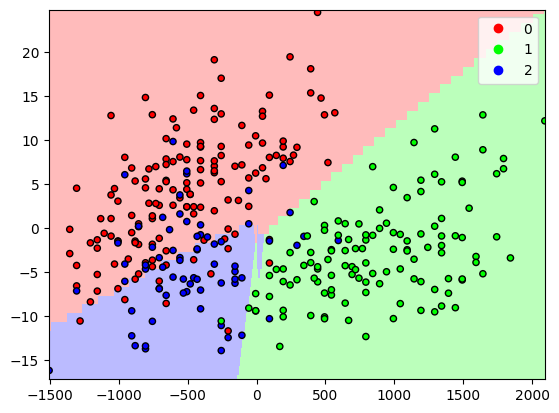

In [ ]:
import numpy as np

principalDf = pd.DataFrame(data = z
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(data=data['species'], columns=['species'])], axis = 1)

X,y=finalDf[['principal component 1', 'principal component 2']].values.reshape(-1, 2), finalDf['species'].values.reshape(-1, 1)
clf = MLPClassifier(activation='tanh', hidden_layer_sizes= 100, learning_rate_init= 0.001).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

Z = Z.reshape(xx.shape)
fig, ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.8)
    # Plot also the training and testing points
scatter=ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
ax.legend(*scatter.legend_elements())
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()